# DAP Re-Vamp -- Exploring Energy Insecurity & Opportunity Using Python-Based Spatial Tools #

In [1]:
# set-up steps
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
import warnings
import time

warnings.filterwarnings("ignore")

# data source loading
energy_df = pd.read_csv('data_sources/for_shiny_app_energy_insecurity.csv')
rooftop_df = pd.read_csv('data_sources/Rooftop_PV_Technical_Potential.csv')
us_counties_gdf = gpd.read_file('data_sources/counties.geojson')
us_states_gdf = gpd.read_file('data_sources/us-states.json')
pp_global_gdf = gpd.read_file('data_sources/globalpowerplantdatabasev130/global_power_plant_database.csv')

# Problem Background

- Energy access is a persistent issue in the USA
- US Department of Energy (DOE) collects data on state level usage
- They also collect randomized community/household level data attributed by state
- __Using our skillsets in Python, we can explore this issue spatially, and begin to build an understanding of where policy makers can deploy resources to expand & improve the grid!__

Text(0.5, 1.0, 'Choropleth Map of the Percentage of Energy Insecure Households by State (only contiguous USA)')

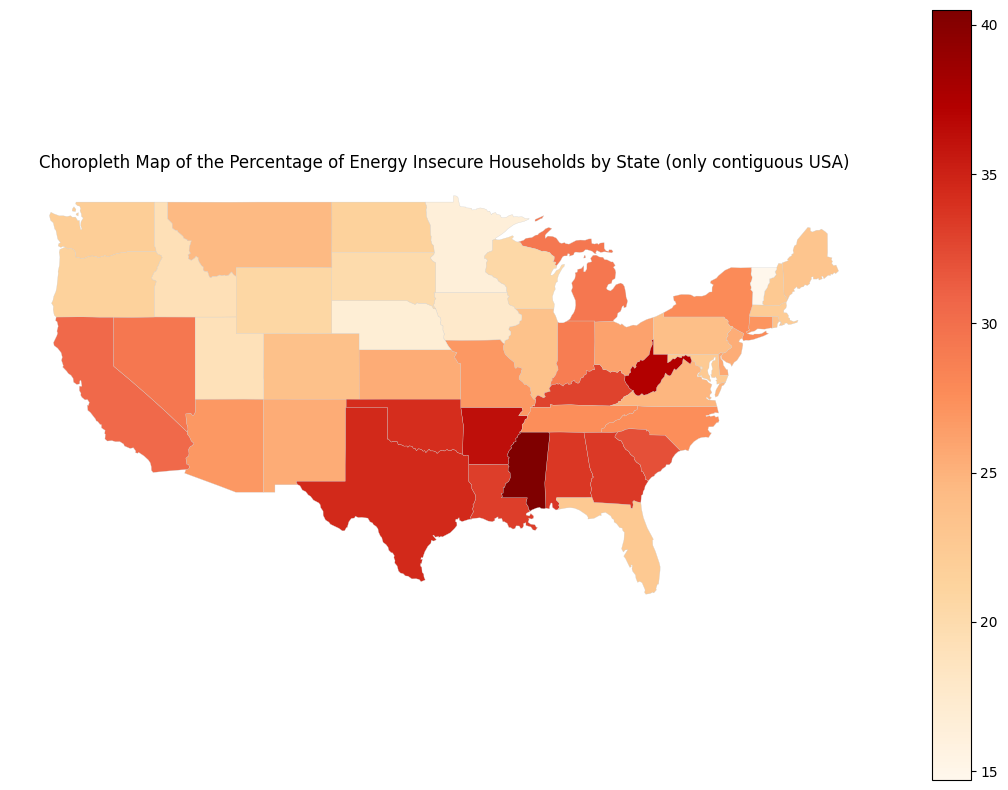

In [9]:
# creating a basic choropleth from the energy insecurity data

# creating standard column values pre-merge
energy_df['STATE'] = energy_df['STATE'].str.lower()
us_states_gdf['name'] = us_states_gdf['name'].str.lower()

# merging data
merged_map_gdf = us_states_gdf.merge(energy_df, left_on= 'name', right_on= 'STATE', how= 'left')

# dropping the states that will distort the map (alaska, hawaii) after the merge for smooth data
merged_map_gdf = merged_map_gdf[~merged_map_gdf['name'].isin(['alaska','hawaii'])]


# choropleth mapping and labeling
fig1, ax1 = plt.subplots(1, 1, figsize=(14, 10)) #if you want to adjust size
merged_map_gdf.plot(column= 'PERCENTAGE', cmap='OrRd', linewidth= 0.2, ax=ax1, edgecolor='0.8',legend= True)

ax1.set_axis_off()
ax1.set_title('Choropleth Map of the Percentage of Energy Insecure Households by State (only contiguous USA)') #if you want to set a title